# OUTLIER NOTEBOOK

In [157]:
import sys
sys.path.append("../notebooks/scripts/")

In [158]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [159]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [160]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [161]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


## Pathogen-specific variables

Consider consolidating these into a single configuration file that can be passed to the notebook as a command line argument for more scriptable generation of these figures.

# Flu Specific Variables

In [4]:
try:
    node_df = snakemake.input.node_df

    pca_df = snakemake.input.pca_df
    explained_variance_pca = snakemake.input.explained_variance_pca

    mds_df = snakemake.input.mds_df

    #Scatterplot:
    scatterplot_pca = snakemake.input.scatterplot_pca
    scatterplot_pca_metadata = snakemake.input.scatterplot_pca_metadata

    scatterplot_mds = snakemake.input.scatterplot_mds
    scatterplot_mds_metadata = snakemake.input.scatterplot_mds_metadata

    scatterplot_tsne = snakemake.input.scatterplot_tsne
    scatterplot_tsne_metadata = snakemake.input.scatterplot_tsne_metadata

    scatterplot_umap = snakemake.input.scatterplot_umap
    scatterplot_umap_metadata = snakemake.input.scatterplot_umap_metadata

    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata = snakemake.input.KDE_pca_metadata

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata = snakemake.input.KDE_mds_metadata

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata = snakemake.input.KDE_tsne_metadata

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata = snakemake.input.KDE_umap_metadata
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata = snakemake.input.KDE_genetic_metadata
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [162]:
domain =  ['outlier', 'not_outlier'] 
range_ = ['#800000','#A9A9A9']

# Reading in all the data from the scripts

In [5]:
import os

os.getcwd()

'/mnt/c/Work/BedfordProjects/cartography/seasonal-flu-nextstrain'

In [11]:
#node_df = pd.read_csv(node_df, sep="\t")
node_df = pd.read_csv("results/table.tsv", sep="\t")

In [12]:
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [13]:
node_df.head()

strain     date  pca1  pca2   mds1   mds2  tsne_x  tsne_y  \
0      A/Chungbuk/107/2016  2016.05 -1.53  5.06   7.65  -8.45  -22.18   34.27   
1  A/MUWRP-Uganda/579/2016  2016.67 -1.15  5.41  13.16 -11.67  -22.28   33.78   
2       A/Shiraz/1011/2015  2015.89 -1.43  5.35   0.84  -5.40  -21.34   33.09   
3       A/Shiraz/1019/2016  2016.00 -1.57  5.34   9.96  -7.33  -21.39   33.14   
4       A/Shiraz/1020/2016  2016.02 -1.58  5.33   9.86 -11.61  -21.41   33.17   

   umap_x  umap_y clade_membership  pca_label  mds_label  umap_label  \
0    3.23    6.53              3c3         -1         -1           3   
1   -0.13  -10.28              3c3         -1         -1           0   
2   -0.49   -9.82            3c3.B         -1         -1           0   
3   -0.64   -9.86              3c3         -1         -1           0   
4   -1.02   -9.77              3c3         -1         -1           0   

   t-sne_label  y  
0            2  1  
1            2  2  
2            2  3  
3            2  4  
4            2  5

In [9]:
node_df.head()

strain     date  pca1  pca2   mds1   mds2  tsne_x  tsne_y  \
0      A/Chungbuk/107/2016  2016.05 -1.53  5.06   7.65  -8.45  -22.18   34.27   
1  A/MUWRP-Uganda/579/2016  2016.67 -1.15  5.41  13.16 -11.67  -22.28   33.78   
2       A/Shiraz/1011/2015  2015.89 -1.43  5.35   0.84  -5.40  -21.34   33.09   
3       A/Shiraz/1019/2016  2016.00 -1.57  5.34   9.96  -7.33  -21.39   33.14   
4       A/Shiraz/1020/2016  2016.02 -1.58  5.33   9.86 -11.61  -21.41   33.17   

   umap_x  umap_y clade_membership  pca_label  mds_label  umap_label  \
0    3.23    6.53              3c3         -1         -1           3   
1   -0.13  -10.28              3c3         -1         -1           0   
2   -0.49   -9.82            3c3.B         -1         -1           0   
3   -0.64   -9.86              3c3         -1         -1           0   
4   -1.02   -9.77              3c3         -1         -1           0   

   t-sne_label  y  
0            2  1  
1            2  2  
2            2  3  
3            2  4  
4            2  5

In [17]:
# Reannotate clades that we aren't interested in as "other" to simplify color assignment in visualizations.
try:
    node_df["clade_membership_color"] = node_df["clade_membership"].apply(lambda clade: clade if clade in clades_to_plot else "other")
except:
    node_df["clade_membership_color"] = node_df["clade_membership"]
    print("clades_to_plot undefined")

# Running PCA on Scaled and Centered Data
- I treated each nucleotide as a "site", or dimension, and found the probability of having a certain nucleotide given the frequency of that letter at that site.
- I used [this paper][1] as my source 
- The equation is as follows where C is the matrix of dimensions, M is the mean, and p is the frequency of a nucleotide at that given site. 
![](https://journals.plos.org/plosgenetics/article/file?type=thumbnail&id=info:doi/10.1371/journal.pgen.0020190.e003)

In [9]:
principalDf = pd.read_csv(pca_df, index_col=0)
#principalDf = pd.read_csv("results/embed_pca.csv", index_col=0)

In [2]:
#explained_variance_df = pd.read_csv(explained_variance_pca)
explained_variance_df = pd.read_csv("results/explained_variance_pca.csv")
explained_variance_df

explained variance  principal components
0              0.2654                     1
1              0.1717                     2
2              0.0903                     3
3              0.0566                     4
4              0.0275                     5
5              0.0233                     6
6              0.0223                     7
7              0.0179                     8
8              0.0153                     9
9              0.0113                    10

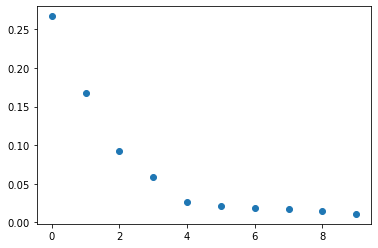

In [14]:
plt.plot(explained_variance_df['principal components'].values.tolist(), explained_variance_df["explained variance"].values.tolist(), 'o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.title(f"Explained Variance Plot (Flu)")

plt.savefig(snakemake.output.Explained_variance_PCA)

In [18]:
merged_pca_df = principalDf.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [19]:
merged_pca_df.head()

strain      pca1      pca2      pca3      pca4      pca5  \
0  A/Alabama/19/2017 -1.379455  7.174854 -0.089772  0.904665  1.286705   
1  A/Alabama/20/2017 -1.379135  7.176229 -0.089954  0.905157  1.288239   
2  A/Florida/20/2017 -1.392833  7.173748 -0.043233  0.966493  1.264657   
3  A/Florida/46/2017 -1.408976  7.174137 -0.034991  0.979565  1.202684   
4  A/Brisbane/1/2017 -1.842705  7.147332  0.188063  0.860524  1.119271   

       pca6      pca7      pca8      pca9     pca10  pca_label     date   y  \
0  1.896531  1.023959  2.028820 -1.462987  0.959922          1  2017.34  18   
1  1.899141  1.023909  2.034385 -1.464239  0.962616          1  2017.34  19   
2  1.957583  1.011282  1.967086 -1.422305  0.841294          1  2017.17  16   
3  1.991184  1.104198  2.003207 -1.318707  0.758196          1  2017.51  17   
4  1.858419  1.028096  1.832736 -1.535925  0.906204          1  2017.00  14   

  clade_membership clade_membership_color  
0            3c3.A                  3c3.A  
1            3c3.A                  3c3.A  
2            3c3.A                  3c3.A  
3            3c3.A                  3c3.A  
4            3c3.A                  3c3.A

In [20]:
explained_variance_PCA = explained_variance_df["explained variance"].values.tolist()

In [21]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

# HDBSCAN Output

In [19]:
list_of_chart = linking_tree_with_plots_clickable(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "pca_label:N",["pca_label"], ['strain']) #domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[4]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

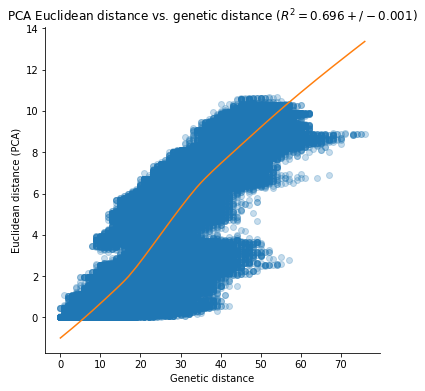

In [21]:
total_df_PCA = pd.read_csv(scatterplot_pca,index_col=0)
metadata_PCA = pd.read_csv(scatterplot_pca_metadata, index_col=0)

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (PCA)")
ax.set_title(f"PCA Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

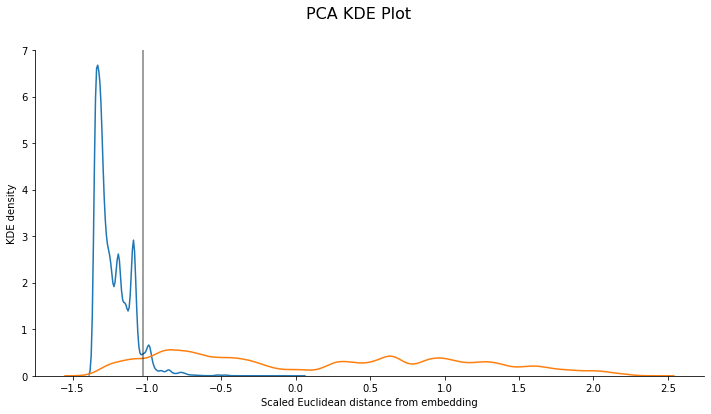

In [22]:
PCA_KDE_df = pd.read_csv(KDE_pca,index_col=0)
PCA_KDE_metadata_df = pd.read_csv(KDE_pca_metadata, index_col=0)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=PCA_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('PCA KDE Plot', fontsize=16)
sns.despine()

# Running MDS on the Dataset

In [23]:
MDS_df = pd.read_csv(mds_df,index_col=0)

In [24]:
merged_mds_df = MDS_df.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [25]:
merged_mds_df

strain       mds1      mds2       mds3       mds4  \
0           A/Alabama/20/2017  18.977642 -0.572897   2.421951 -10.997830   
1           A/Brisbane/1/2017  18.993810  0.278117   2.645904 -12.560332   
2           A/NewYork/88/2016  18.624932 -0.127514   2.950911 -12.086349   
3           A/NewYork/99/2016  18.045875  0.773539   2.406129 -13.070893   
4       A/Washington/289/2017  18.141469  0.365109   2.211602 -12.252616   
...                       ...        ...       ...        ...        ...   
1144     A/India/1736023/2017  -3.098309 -5.600465 -16.918797   4.951125   
1145     A/HongKong/3391/2017  16.924097  4.378559  -2.795594  -2.478939   
1146         A/Kenya/013/2017 -10.559669 -2.992636  -8.874910  16.924039   
1147      A/Keelung/0023/2016   2.122133  0.151047   9.819374 -10.578167   
1148  A/MUWRP-Uganda/579/2016  19.965989  3.878731   1.507589 -17.509036   

           mds5       mds6      mds7       mds8       mds9      mds10  \
0     15.481121  16.358408  5.435225   1.338728 -25.726731  11.044589   
1     14.587145  12.966931  2.431520   2.122450 -21.418881  10.712964   
2     13.779707  12.798405  1.848802   2.339338 -21.223111   9.746386   
3     13.500025  14.014281  1.859755   3.287545 -22.151445   9.155446   
4     13.811752  14.675569  2.309219   3.273076 -23.588832   9.480620   
...         ...        ...       ...        ...        ...        ...   
1144  11.183889  -9.358526 -8.320560   2.531532   0.893764 -10.618840   
1145 -12.223688  -2.708037  2.646870   4.300610  -2.882895   7.324545   
1146  15.777779  -7.440266 -6.865349  -0.564332   8.638332   9.408819   
1147 -11.720839  -5.102204 -3.490567   4.753809   4.615495  -6.181015   
1148   6.903662   8.665535  3.626675 -16.775610   3.219827  21.672538   

      mds_label     date     y clade_membership clade_membership_color  
0             0  2017.34    18            3c3.A                  3c3.A  
1             0  2017.00    15            3c3.A                  3c3.A  
2             0  2016.57    13            3c3.A                  3c3.A  
3             0  2016.73    16            3c3.A                  3c3.A  
4             0  2017.26    22            3c3.A                  3c3.A  
...         ...      ...   ...              ...                    ...  
1144         -1  2017.79   969         A1b/135K               A1b/135K  
1145         -1  2017.52   254               A3                     A3  
1146         -1  2017.19  1059              A1b                  other  
1147         -1  2016.02   272            3c2.A                  other  
1148         -1  2016.67     2              3c3                  other  

[1149 rows x 16 columns]

In [26]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df,'mds1','mds2',"mds1","mds2",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_34_mds = scatterplot_with_tooltip_interactive(merged_mds_df,'mds3','mds4',"mds3","mds4",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_56_mds = scatterplot_with_tooltip_interactive(merged_mds_df,'mds5','mds6',"mds5","mds6",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_12_mds|chart_34_mds|chart_56_mds

alt.HConcatChart(...)

In [27]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
list_of_chart[0]|list_of_chart[1]

alt.HConcatChart(...)

# HDBSCAN output:

In [28]:
list_of_chart = linking_tree_with_plots_clickable(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'mds_label:N', ["mds_label"], ['strain','clade_membership'])
list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

alt.HConcatChart(...)

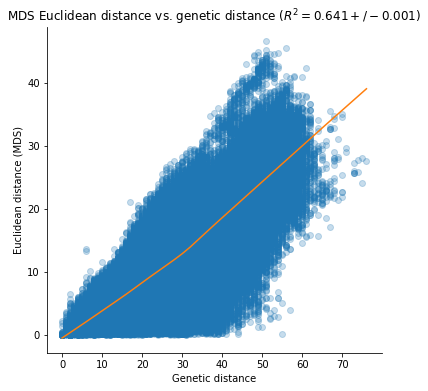

In [29]:
total_df_MDS = pd.read_csv(scatterplot_mds,index_col=0)
metadata_MDS = pd.read_csv(scatterplot_mds_metadata, index_col=0)

mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (MDS)")
ax.set_title(f"MDS Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

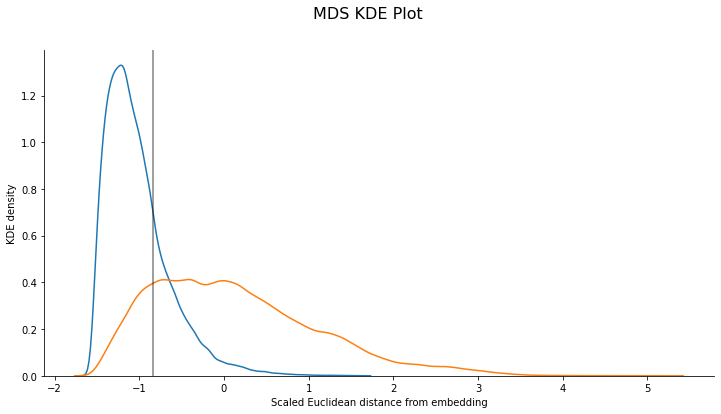

In [30]:
MDS_KDE_df = pd.read_csv(KDE_mds,index_col=0)
MDS_KDE_metadata_df = pd.read_csv(KDE_mds_metadata, index_col=0)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=MDS_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('MDS KDE Plot', fontsize=16)
sns.despine()

# Running T-SNE on the Dataset 

In [32]:
TSNE_df = node_df[["strain", "date", "y", "clade_membership", "tsne_x", "tsne_y", "t-sne_label"]]

In [33]:
scatterplot_with_tooltip_interactive(TSNE_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [39]:
list_of_chart = linking_tree_with_plots_brush(
    TSNE_df,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

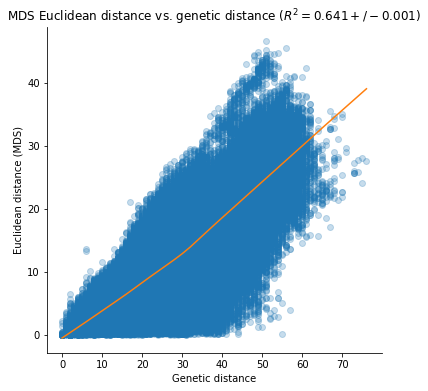

In [29]:
total_df_TSNE = pd.read_csv(scatterplot_tsne,index_col=0)
metadata_TSNE = pd.read_csv(scatterplot_tsne_metadata, index_col=0)

mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (t-SNE)")
ax.set_title(f"t-SNE Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

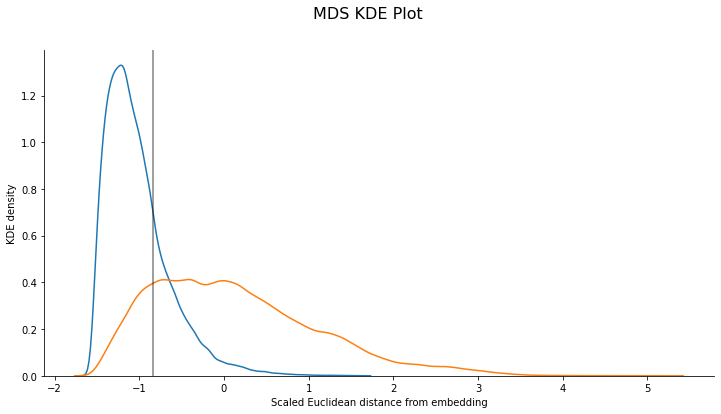

In [30]:
TSNE_KDE_df = pd.read_csv(KDE_tsne,index_col=0)
TSNE_KDE_metadata_df = pd.read_csv(KDE_tsne_metadata, index_col=0)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=TSNE_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('t-SNE KDE Plot', fontsize=16)
sns.despine()

# Running UMAP on the Dataset

In [35]:
UMAP_df = node_df[["strain", "date", "y", "clade_membership", "umap_x", "umap_y"]]

In [36]:
scatterplot_with_tooltip_interactive(UMAP_df,'umap_x','umap_y','umap_x','umap_y',['strain'],'clade_membership:N', domain, range_)

alt.Chart(...)

In [38]:
list_of_data_and_titles = ['umap_x','umap_y']
list_of_chart = linking_tree_with_plots_brush(
    UMAP_df,
    list_of_data_and_titles,
    list_of_data_and_titles,
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap
#chart.save("../docs/UMAPMERSBrush.html")

alt.HConcatChart(...)

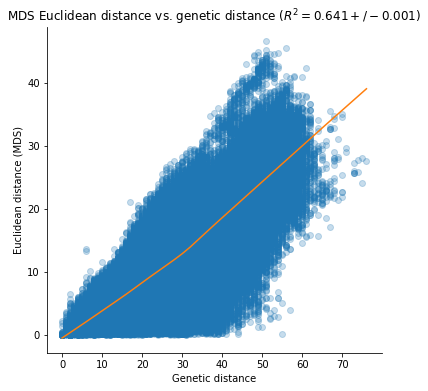

In [29]:
total_df_UMAP = pd.read_csv(scatterplot_umap,index_col=0)
metadata_UMAP = pd.read_csv(scatterplot_umap_metadata, index_col=0)

mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (UMAP)")
ax.set_title(f"UMAP Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

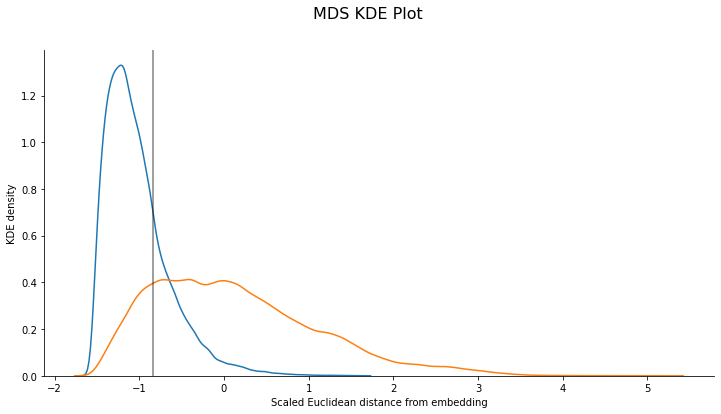

In [30]:
UMAP_KDE_df = pd.read_csv(KDE_umap,index_col=0)
UMAP_KDE_metadata_df = pd.read_csv(KDE_umap_metadata, index_col=0)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=UMAP_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('UMAP KDE Plot', fontsize=16)
sns.despine()

# Linking all plots together clickable with Tree

In [25]:
data = linking_tree_with_plots_brush(
    node_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain'],
    domain,
    range_
)

In [26]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart
#fullChart.save("../docs/FullLinkedChartBrushableFlu.html")
fullChart.save(snakemake.output.fullChart)
save(fullChart, snakemake.output.fullChartPNG, scale_factor=2.0)

alt.VConcatChart(...)

## Scatterplots for all embeddings 
Concatenating all embedding data frames to plot genetic vs Euclidean distance for each embedding

In [ ]:
import matplotlib.gridspec as gridspec

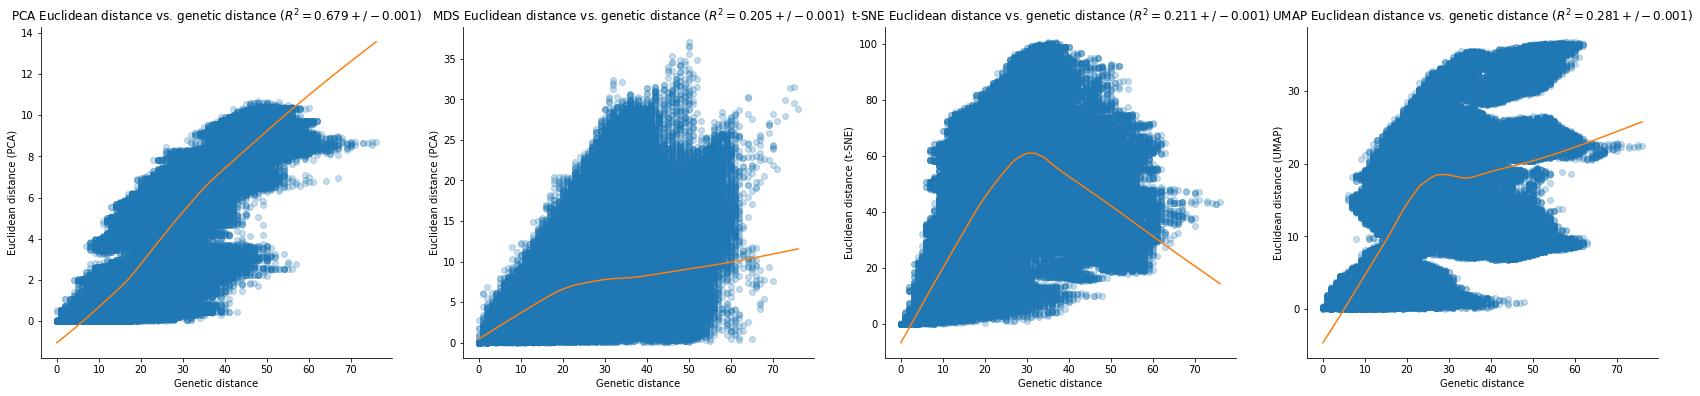

In [126]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.tight_layout(pad=8.0)
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.8)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]

ax1.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax1.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax1.set_xlabel("Genetic distance")
ax1.set_ylabel("Euclidean distance (PCA)")
ax1.set_title(f"PCA Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

ax2.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax2.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax2.set_xlabel("Genetic distance")
ax2.set_ylabel("Euclidean distance (PCA)")
ax2.set_title(f"MDS Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

ax3.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax3.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax3.set_xlabel("Genetic distance")
ax3.set_ylabel("Euclidean distance (t-SNE)")
ax3.set_title(f"t-SNE Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")



mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

ax4.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax4.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax4.set_xlabel("Genetic distance")
ax4.set_ylabel("Euclidean distance (UMAP)")
ax4.set_title(f"UMAP Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


sns.despine()
plt.savefig(snakemake.output.Scatterplot, dpi=300)

## Within- and between-clade Euclidean distances for all embeddings

Use the complete embedding data frame to calculate pairwise Euclidean distances between samples and plot the results in a single figure.

In [127]:
Genetic_KDE_df = pd.read_csv(KDE_genetic,index_col=0)
Genetic_KDE_metadata_df = pd.read_csv(KDE_genetic_metadata, index_col=0)

In [128]:
import matplotlib.gridspec as gridspec

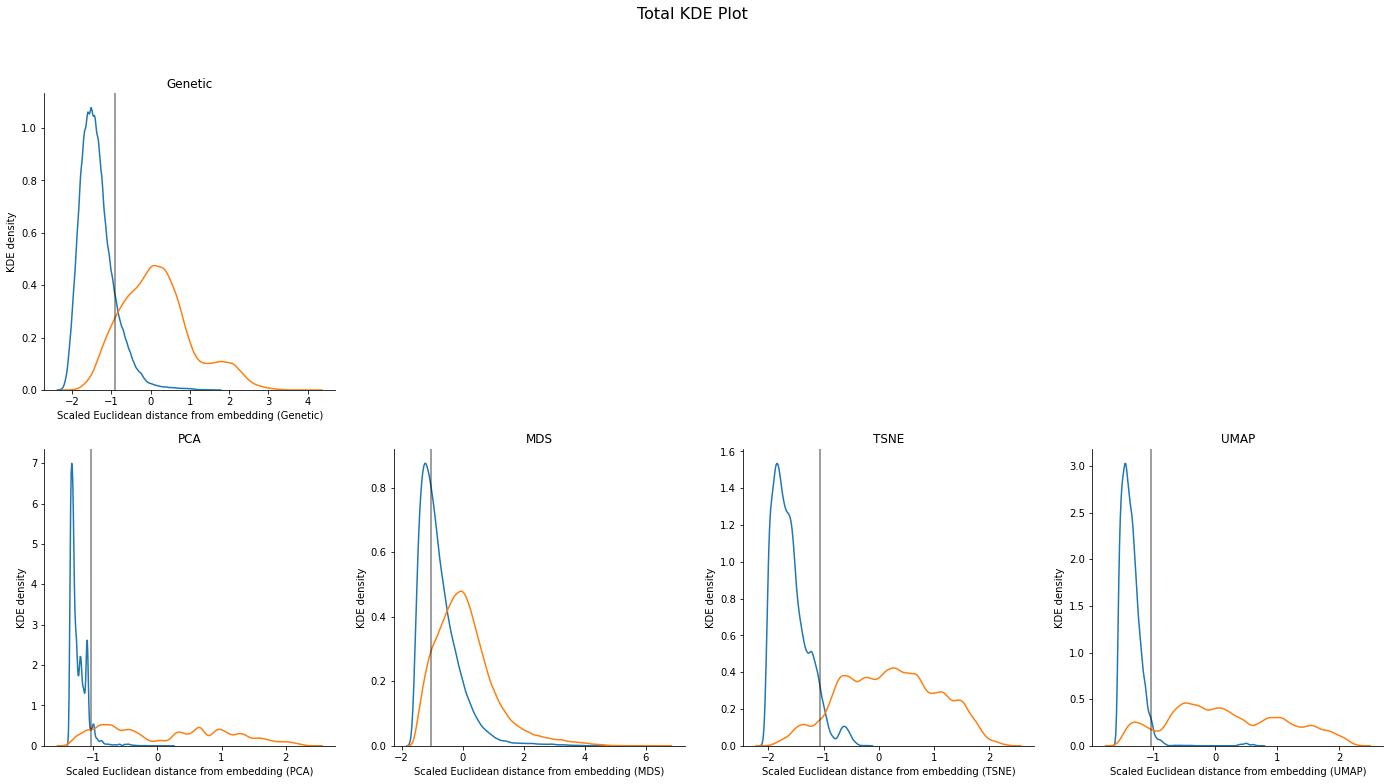

In [131]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('PCA')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('MDS')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('TSNE')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('UMAP')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")


fig.suptitle('Total KDE Plot', fontsize=16)
sns.despine()
plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')

# Supplemental Figures

In [45]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds' + str(i) for i in range(1,11)],['MDS' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.MDS_Supplement)
save(chart, snakemake.output.MDS_Supplement_PNG)

In [46]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca' + str(i) for i in range(1,11)],['PCA' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.PCA_Supplement)
save(chart, snakemake.output.PCA_Supplement_PNG)

In [3]:
import sys
sys.path.append("../notebooks/scripts")

In [110]:
from augur.utils import read_node_data
import Bio.SeqIO
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.manifold import MDS, TSNE
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from Bio import SeqIO
from Helpers import get_hamming_distances, get_euclidean_data_frame

%matplotlib inline

In [74]:
import re
with open("../outlier_analysis/config/outliers_h3n2.txt", 'r') as outlier:
    lines = outlier.read().split('\n')

# concatenate metadata
human_df = pd.read_csv("../outlier_analysis/results/metadata_human.tsv", sep='\t')
outlier_df = pd.read_csv("../outlier_analysis/results/metadata_swine.tsv", sep='\t')
concatenated_metadata = pd.concat([human_df, outlier_df])

lines = lines + outlier_df["strain"].values.tolist()

strain_names = concatenated_metadata['strain'].values.tolist()
outlier_list = []

for i in range(0,len(lines)):
    lines[i] = re.sub(r'\|.*$', '', str(lines[i]))  
    
for i in range(0,len(strain_names)):
    if strain_names[i] in lines:
        outlier_list.append("outlier")
    else:
        outlier_list.append("not_outlier")

concatenated_metadata['outlier'] = outlier_list


651


strain        date accession    country  \
2693            A/Guangdong/YueFang277/2017  2017-03-31  MK117070      China   
3320                         A/Iowa/38/2017  2017-12-01  MK239073        USA   
7214                       A/Sydney/53/2015  2015-06-17  CY253218  Australia   
8929  A/environment/Indiana/16TOSU3546/2016  2016-06-01  KY935555        USA   
8930  A/environment/Indiana/16TOSU3553/2016  2016-06-01  KY935523        USA   
...                                     ...         ...       ...        ...   
639         A/swine/Virginia/A02478454/2019  2019-04-26  MK967619        USA   
640         A/swine/Virginia/A02478581/2019  2019-04-22  MN436839        USA   
641         A/swine/Virginia/A02478738/2019  2019-08-29  MN608561        USA   
642        A/swine/Wisconsin/A02140875/2018  2018-01-19  MG977436        USA   
643          A/swine/Wyoming/A02245222/2019  2019-08-23  MN543888        USA   

     region  outlier  
2693      N  outlier  
3320      N  outlier  
7214      S  outlier  
8929      N  outlier  
8930      N  outlier  
...     ...      ...  
639       N  outlier  
640       N  outlier  
641       N  outlier  
642       N  outlier  
643       N  outlier  

[651 rows x 6 columns]

## Define inputs, outputs, and parameters

In [90]:
sequences_path = "../outlier_analysis/results/aligned.fasta"
metadata_path = "../outlier_analysis/results/total_metadata.fasta"

## Load genome sequences

In [91]:
#work on making this work
strains = []
genomes = []
for record in SeqIO.parse(sequences_path, "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

In [94]:
#### Checking to make sure the file I picked is a aligned Fasta file / is the file I wanted
print(len(genomes[0]) == len(genomes[1]))
print(len(genomes))

True
2598


In [95]:
strains[:5]

['A/Shiraz/1006/2015',
 'A/Alabama/14/2018',
 'A/Oklahoma/20/2018',
 'A/Victoria/2020/2018',
 'A/Alaska/46/2018']

In [118]:
genomes_df = pd.DataFrame(genomes)
strains_df = pd.DataFrame(strains)

genomes_df.columns = ["strain"]
strains_df.columns = ["strain"]

In [122]:
genomes_df

strain
0     ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...
1     ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
2     ATGAAGACTACCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
3     ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
4     ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCG...
...                                                 ...
2593  ATGAAGACTATCATTGCTTTCAGCTGCATTTTATGTCAAATTTTCG...
2594  ATGAAGACTATCATTGCTTTAAGCTGCATTTTATGTCAAATTTTCG...
2595  ATGAAGACTATCATTGCTTTTAGCTGCATTTTATGTCTGATTTTCG...
2596  ATGAAGACTATCATTGCTTTTAGCTGCATTTCATGTTTGATTTTCG...
2597  ATGAAGACCATCATTGCTTTTAGCTGCACTTTATGTCTGATTTTCG...

[2598 rows x 1 columns]

## Calculate distance matrix

In [98]:
hamming_distances = get_hamming_distances(
    genomes
)
distance_matrix = squareform(hamming_distances)

In [99]:
distance_matrix.shape

(2598, 2598)

<AxesSubplot:>

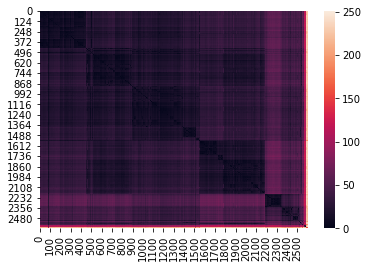

In [100]:
sns.heatmap(distance_matrix)

In [108]:
distance_matrix = pd.DataFrame(
    distance_matrix,
    columns=strains,
    index=strains
)

# Creating outliers

In [119]:
metadata_df = pd.read_csv(metadata_path, sep='\t', engine='python')

In [120]:
metadata_df

strain        date accession country region  \
0                    A/Alabama/01/2017  2017-01-04  CY216617     USA      N   
1                    A/Alabama/02/2015  2015-01-26  KT836052     USA      N   
2                    A/Alabama/02/2016  2016-01-27  KX412662     USA      N   
3                    A/Alabama/02/2017  2017-01-05  CY216609     USA      N   
4                    A/Alabama/03/2017  2017-01-19  CY216625     USA      N   
...                                ...         ...       ...     ...    ...   
9573   A/swine/Virginia/A02478454/2019  2019-04-26  MK967619     USA      N   
9574   A/swine/Virginia/A02478581/2019  2019-04-22  MN436839     USA      N   
9575   A/swine/Virginia/A02478738/2019  2019-08-29  MN608561     USA      N   
9576  A/swine/Wisconsin/A02140875/2018  2018-01-19  MG977436     USA      N   
9577    A/swine/Wyoming/A02245222/2019  2019-08-23  MN543888     USA      N   

          outlier  
0     not_outlier  
1     not_outlier  
2     not_outlier  
3     not_outlier  
4     not_outlier  
...           ...  
9573      outlier  
9574      outlier  
9575      outlier  
9576      outlier  
9577      outlier  

[9578 rows x 6 columns]

In [126]:
metadata_df = strains_df.merge(metadata_df, on="strain")

In [ ]:
node_df = pd.read_csv("../outlier_analysis/results/table.tsv", sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)
node_df

# TSNE

In [124]:
from Helpers import get_euclidean_data_frame, get_hamming_distances, linking_tree_with_plots_brush
from Helpers import linking_tree_with_plots_clickable
from Helpers import scatterplot_xyvalues, scatterplot_tooltips, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

In [127]:
embedding = TSNE(n_components=2,metric='precomputed',perplexity = 25.95)
X_transformed_tsne = embedding.fit_transform(distance_matrix)

TSNE_df = pd.DataFrame(X_transformed_tsne,columns=['TSNE' + str(i) for i in range(1,3)])

TSNE_df["strain"] = distance_matrix.index

merged_tsne_df = TSNE_df.merge(metadata_df, on="strain")

In [128]:
merged_tsne_df

TSNE1      TSNE2                               strain        date  \
0     20.570419 -33.471523                   A/Shiraz/1006/2015  2015-10-23   
1     61.035454 -10.573983                    A/Alabama/14/2018  2018-02-03   
2     60.983486 -12.996558                   A/Oklahoma/20/2018  2018-03-19   
3     61.625374 -14.461730                 A/Victoria/2020/2018  2018-05-25   
4     56.571060 -10.948489                     A/Alaska/46/2018  2018-06-01   
...         ...        ...                                  ...         ...   
2593  20.519835 -36.396103          A/swine/Manitoba/D0525/2018  2018-01-18   
2594  20.519825 -36.395947      A/swine/Nebraska/A01785413/2018  2018-01-09   
2595  22.560678 -36.241852  A/swine/BritishColumbia/SD0286/2018  2018-04-10   
2596  22.550470 -36.226887     A/swine/Saskatchewan/SD0271/2018  2018-03-09   
2597  21.616800 -35.903702     A/swine/Saskatchewan/SD0300/2018  2018-05-08   

     accession    country region      outlier  
0     MF993038       Iran      N  not_outlier  
1     MH126385        USA      N  not_outlier  
2     MH358479        USA      N  not_outlier  
3     MN573151  Australia      S  not_outlier  
4     MK027499        USA      N  not_outlier  
...        ...        ...    ...          ...  
2593  MK462701     Canada      N      outlier  
2594  MG907117        USA      N      outlier  
2595  MK462435     Canada      N      outlier  
2596  MK462563     Canada      N      outlier  
2597  MK462451     Canada      N      outlier  

[2598 rows x 8 columns]

In [156]:
merged_tsne_df["outlier"].value_counts()

not_outlier    2561
outlier          37
Name: outlier, dtype: int64

In [140]:
domain =  ['outlier', 'not_outlier'] 
range_ = ['#800000','#A9A9A9']

In [141]:
scatterplot_with_tooltip_interactive(merged_tsne_df,'TSNE1','TSNE2',"TSNE1","TSNE2",['strain:N'],'outlier:N', domain, range_)

alt.Chart(...)

# PCA

In [144]:
numbers = genomes[:]
for i in range(0,len(strains)):
    numbers[i] = re.sub(r'[^AGCT]', '5', numbers[i])
    numbers[i] = list(numbers[i].replace('A','1').replace('G','2').replace('C', '3').replace('T','4'))
    numbers[i] = [int(j) for j in numbers[i]]

genomes_df = pd.DataFrame(numbers)
genomes_df.columns = ["Site " + str(k) for k in range(0,len(numbers[i]))]
genomes_df

Site 0  Site 1  Site 2  Site 3  Site 4  Site 5  Site 6  Site 7  Site 8  \
0          1       4       2       1       1       2       1       3       4   
1          1       4       2       1       1       2       1       3       4   
2          1       4       2       1       1       2       1       3       4   
3          1       4       2       1       1       2       1       3       4   
4          1       4       2       1       1       2       1       3       4   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2593       1       4       2       1       1       2       1       3       4   
2594       1       4       2       1       1       2       1       3       4   
2595       1       4       2       1       1       2       1       3       4   
2596       1       4       2       1       1       2       1       3       4   
2597       1       4       2       1       1       2       1       3       3   

      Site 9  ...  Site 1691  Site 1692  Site 1693  Site 1694  Site 1695  \
0          1  ...          4          4          2          3          1   
1          1  ...          4          4          2          3          1   
2          1  ...          4          4          2          3          1   
3          1  ...          4          4          2          3          1   
4          1  ...          4          4          2          3          1   
...      ...  ...        ...        ...        ...        ...        ...   
2593       1  ...          4          4          2          3          2   
2594       1  ...          4          4          2          3          2   
2595       1  ...          4          4          2          3          1   
2596       1  ...          4          4          2          3          1   
2597       1  ...          4          4          2          3          1   

      Site 1696  Site 1697  Site 1698  Site 1699  Site 1700  
0             4          4          4          2          1  
1             4          4          4          2          1  
2             4          4          4          2          1  
3             4          4          4          2          1  
4             4          4          4          2          1  
...         ...        ...        ...        ...        ...  
2593          4          4          4          2          1  
2594          4          4          4          1          1  
2595          4          4          4          2          1  
2596          4          4          4          2          1  
2597          4          4          4          2          1  

[2598 rows x 1701 columns]

In [154]:
from sklearn.decomposition import PCA
#performing PCA on my pandas dataframe
pca = PCA(n_components=10,svd_solver='full') #can specify n, since with no prior knowledge, I use None
principalComponents = pca.fit_transform(genomes_df)

# Create a data frame from the PCA embedding.
embedding = principalComponents
embedding_df = pd.DataFrame(principalComponents)
embedding_df.columns = ["PCA" + str(k) for k in range(1,11)]
embedding_df["strain"] = strains
embedding_df = embedding_df.merge(metadata_df, on="strain")
embedding_df

PCA1      PCA2      PCA3      PCA4       PCA5      PCA6      PCA7  \
0     3.724962  0.418305  1.036767  0.592404   8.550370  3.387962 -0.110466   
1    -2.381478  4.199181 -0.321386  1.642291   0.154420 -0.249703 -0.254604   
2    -2.463579  4.190217 -0.292285  1.622519   0.103944 -0.059401 -0.209661   
3    -2.459102  4.195369 -0.178580  1.628330   0.091077 -0.067337 -0.257039   
4    -2.472545  4.189788 -0.206109  1.627503   0.027130 -0.071251 -0.152679   
...        ...       ...       ...       ...        ...       ...       ...   
2593  5.627116  0.235281  2.441800  1.682315  12.580804  7.430889 -2.326995   
2594  5.733418  0.309753  2.327406  1.699939  12.494788  8.077988 -1.009295   
2595  4.237014  1.291448  2.626878  4.020228  13.286855  7.895084 -2.020919   
2596  4.206248  1.547837  2.820715  3.791242  13.292497  7.462757 -1.824442   
2597  4.541760 -0.142892  2.616049  1.789772  13.048654  7.622261 -2.383553   

          PCA8      PCA9     PCA10                               strain  \
0    -0.507751  0.466206  1.006451                   A/Shiraz/1006/2015   
1    -0.742150 -0.334635  0.508944                    A/Alabama/14/2018   
2    -0.769977 -0.300441  0.437036                   A/Oklahoma/20/2018   
3    -0.829117 -0.317085  0.325939                 A/Victoria/2020/2018   
4    -0.680396 -0.294437  0.584625                     A/Alaska/46/2018   
...        ...       ...       ...                                  ...   
2593  1.309428 -1.598683  0.846379          A/swine/Manitoba/D0525/2018   
2594  0.761875 -1.747404  0.630289      A/swine/Nebraska/A01785413/2018   
2595  2.587133 -1.300846 -0.481330  A/swine/BritishColumbia/SD0286/2018   
2596  2.193779 -1.005861 -0.550990     A/swine/Saskatchewan/SD0271/2018   
2597  1.583430 -1.900601  0.187797     A/swine/Saskatchewan/SD0300/2018   

            date accession    country region      outlier  
0     2015-10-23  MF993038       Iran      N  not_outlier  
1     2018-02-03  MH126385        USA      N  not_outlier  
2     2018-03-19  MH358479        USA      N  not_outlier  
3     2018-05-25  MN573151  Australia      S  not_outlier  
4     2018-06-01  MK027499        USA      N  not_outlier  
...          ...       ...        ...    ...          ...  
2593  2018-01-18  MK462701     Canada      N      outlier  
2594  2018-01-09  MG907117        USA      N      outlier  
2595  2018-04-10  MK462435     Canada      N      outlier  
2596  2018-03-09  MK462563     Canada      N      outlier  
2597  2018-05-08  MK462451     Canada      N      outlier  

[2598 rows x 16 columns]

In [155]:
scatterplot_with_tooltip_interactive(embedding_df,'PCA1','PCA2',"PCA1","PCA2",['strain:N'],'outlier:N', domain, range_)

alt.Chart(...)

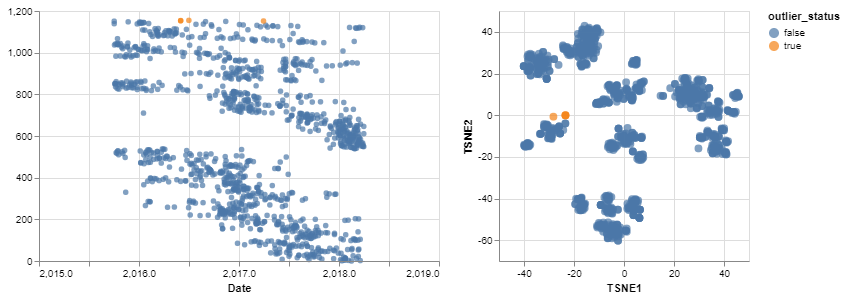

In [45]:
list_of_chart = linking_tree_with_plots_brush(
    merged_tsne_df,
    ['TSNE1','TSNE2'],
    ['TSNE1','TSNE2'],
    'outlier_status',
    ["clade_membership:N","strain:N"]
)
chart = list_of_chart[0]|list_of_chart[1]
chart


In [46]:
# TODO: run classifier, generate desity plot, confusion matrix, test validity, send to John and push to git

## Assign sequences to k-fold groups and analyze each fold

For each fold, use the training indices to subset the distance matrix to just those columns and rows that belong in the training data. Apply a given embedding method to the distance matrix subset, identify the classification threshold for clade membership, and validate that threshold on the subset of the distance matrix corresponding to the validation indices.

In [47]:
# TODO: In practice we will want to iterate over all combinations of parameters
# for all embedding methods and also support PCA (which does not use a distance matrix as input).
embedding_class = TSNE
embedding_parameters = {
    "metric": "precomputed",
    "perplexity": 30,
    "learning_rate": 500
}

In [48]:
embedding_class = UMAP
embedding_parameters = {
    "n_neighbors": 20,
    "min_dist": 0.5,
    "n_components": 2,
    "init": "spectral"
}

In [49]:
embedding_class = MDS
embedding_parameters = {
    "dissimilarity": "precomputed"
}

In [50]:
fold_factory = KFold(n_splits=5, shuffle=True)
folds = fold_factory.split(distance_matrix.index)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression

In [57]:
def assign_outliers(outlier_annotations,index):
    outlier_status = []
    outlier_annotations = np.array(outlier_annotations["outlier_status"])
    print(len(np.take(outlier_annotations, index)))
    return np.take(outlier_annotations, index)

In [58]:
def create_mean_values(distance_matrix, index):
    mean_distance_matrix  = pd.DataFrame()
    mean_distance_matrix["mean"] = distance_matrix.mean(axis=1)
    return np.take(np.array(mean_distance_matrix), index)

In [59]:
distance_matrix = np.array(distance_matrix)
#np.take(distance_matrix_array, training_index)

In [62]:
# TODO: consider adding support for an exhaustive grid search of parameters 
# for different embeddings and the classifier:
# https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search
genetic_accuracies = []
accuracies = []
classifier_thresholds = []
confusion_matrices = []
matthews_cc = []
for k, (training_index, validation_index) in enumerate(folds): 
    print(f"Fit to fold: {k}")
    # Subset distance matrix to training indices.
    training_distance_matrix = distance_matrix[training_index][:, training_index]
    
    # Embed training distance matrix.
    
    embedder = embedding_class(**embedding_parameters)
    
    training_embedding = embedder.fit_transform(training_distance_matrix)
    
    training_embedding_distances = pdist(training_embedding)
    
    training_embedding_distances = squareform(training_embedding_distances).reshape(-1, 1)
    
    training_embedding_distances = np.reshape(training_embedding_distances, (len(training_index), len(training_index)))
    

    # Assign a binary class to each pair of samples based on their clade memberships.
    # Samples from different clades are assigned 0, samples from the same clade as assigned 1.
    # This vector of binary values will be the output to fit a classifier to.
    # These pairs should be in the same order as the embedding distances above.      
          
    training_outlier_status_for_pairs = assign_outliers(
        outlier_annotations,
        training_index
    )
    
    # Use a support vector machine classifier to identify an optimal threshold
    # to distinguish between within and between class pairs.
    # See also: https://scikit-learn.org/stable/modules/svm.html#svm-classification
    classifier = make_pipeline(
        StandardScaler(),
        LogisticRegression(solver='lbfgs', max_iter=7600)
        #LinearSVC(random_state=0, tol=1e-5, dual = True, max_iter = 10000)
    )

    classifier.fit(training_embedding_distances, training_outlier_status_for_pairs)
    
    classifier_threshold = (0.5 - classifier.named_steps["lbfgs"].intercept_) / classifier.named_steps["lbfgs"].coef_[0]
    classifier_thresholds.append(classifier_threshold)

Fit to fold: 0
925


KeyError: 'lbfgs'

In [ ]:
    # Use a SVM to identify an optimal threshold for genetic distances.
    genetic_classifier = make_pipeline(
        StandardScaler(),
        LinearSVC(random_state=0, tol=1e-5)
    )
    genetic_classifier.fit(squareform(training_distance_matrix).reshape(-1, 1), training_clade_status_for_pairs)
    
    # Subset distance matrix to validation indices.
    validation_distance_matrix = distance_matrix[validation_index][:, validation_index]
    
    # Embed validation distance matrix.
    validation_embedding = embedder.fit_transform(validation_distance_matrix)
    
    # Calculate Euclidean distance between pairs of samples in the embedding.
    # The output should be a data frame of distances between pairs.
    validation_embedding_distances = pdist(validation_embedding).reshape(-1, 1)
    
    # Assign a binary class to each pair of samples based on their clade memberships.
    # Samples from different clades are assigned 0, samples from the same clade as assigned 1.
    # This vector of binary values will be the output to fit a classifier to.
    # These pairs should be in the same order as the embedding distances above.
    validation_clade_status_for_pairs = assign_outliers(
        clade_annotations,
        validation_index
    )

    # Predict and score clade status from embedding distances and the trained classifier.
    # The first argument is the set to predict classifier labels for. The second argument
    # is the list of true labels. The return argument is the mean accuracy of the predicted
    # labels.
    # https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.score
    confusion_matrices.append(confusion_matrix(classifier.predict(validation_embedding_distances), validation_clade_status_for_pairs))
    matthews_cc.append(matthews_corrcoef(classifier.predict(validation_embedding_distances), validation_clade_status_for_pairs))
    
    accuracy = classifier.score(
        validation_embedding_distances,
        validation_clade_status_for_pairs
    )
    print(f"Accuracy: {accuracy}")
    
    genetic_accuracy = genetic_classifier.score(
        squareform(validation_distance_matrix).reshape(-1, 1),
        validation_clade_status_for_pairs
    )
    print(f"Genetic accuracy: {genetic_accuracy}")
    print()
    
    accuracies.append(accuracy)
genetic_accuracies.append(genetic_accuracy)

In [ ]:
sns.heatmap(confusion_matrices[3], annot=True)

In [ ]:
training_embedding_df = pd.DataFrame(training_embedding, columns=["x", "y"])
training_embedding_df["clade"] = clade_annotations.loc[training_index, "clade"].values

In [ ]:
validation_embedding_df = pd.DataFrame(validation_embedding, columns=["x", "y"])
validation_embedding_df["clade"] = clade_annotations.loc[validation_index, "clade"].values

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot("x", "y", hue="clade", data=training_embedding_df, legend=False, ax=axes[0])
axes[0].set_title("Training")

sns.scatterplot("x", "y", hue="clade", data=validation_embedding_df, legend=False, ax=axes[1])
axes[1].set_title("Validation")

sns.despine()

In [ ]:
training_embedding_distances.shape

In [ ]:
training_clade_status_for_pairs.shape

In [ ]:
training_embedding_distances.flatten()

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(training_embedding_distances)

In [ ]:
distances_df = pd.DataFrame({"distance": training_embedding_distances.flatten(), "same_clade": training_clade_status_for_pairs.flatten()})

In [ ]:
distances_df.head()

In [ ]:
distances_df["scaled_distance"] = scaler.fit_transform(training_embedding_distances).flatten()

In [ ]:
distances_df["genetic_distance"] = squareform(training_distance_matrix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax = sns.kdeplot(distances_df.query("same_clade == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(distances_df.query("same_clade == 0")["scaled_distance"], label="Different clade", ax=ax)

for classifier_threshold in classifier_thresholds:
    ax.axvline(x=classifier_threshold, label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance from embedding")
ax.set_ylabel("KDE density")

ax = axes[1]
ax = sns.kdeplot(distances_df.query("same_clade == 1")["genetic_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(distances_df.query("same_clade == 0")["genetic_distance"], label="Different clade", ax=ax)

ax.set_xlabel("Genetic distance")
ax.set_ylabel("KDE density")

sns.despine()

## Plot and summarize accuracies

In [ ]:
# Print the mean accuracy and stddev
print(f"Accuracy: {np.mean(accuracies)} +/- {np.std(accuracies)}")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
bins = np.arange(0, 1.01, 0.05)

ax.hist(accuracies, bins=bins)

ax.axvline(
    x=np.mean(accuracies),
    label=f"Mean accuracy: {np.mean(accuracies):.2f} +/- {np.std(accuracies):.2f}",
    color="orange"
)

ax.set_xlabel("Accuracy of classifier")
ax.set_ylabel("Number of cross-validation folds")

ax.legend(frameon=False)

sns.despine()

## Plot classifier thresholds

The linear support vector classifier (SVC) produces an intercept and coefficient for a single feature that represents a line through the domain of the input data that classifies samples into "same clade" (1) or "different clade" (0). The midpoint between these classification labels (0.5) is useful for visualizing the placement of the SVC results. We calculate the value of the input domain that corresponds to this line by solving for $0.5 = mx + b$ where $x$ is the value of interest from the input domain.

Below we plot the resulting distribution of classifier thresholds across all *k* folds to get a sense of how consistent these values are across training sets. Note that the input data have been scaled to z-values (centered by their mean and divided by their standard deviation).

In [ ]:
classifier_thresholds = np.array(classifier_thresholds).flatten()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(classifier_thresholds.flatten(), bins=10)

ax.axvline(
    x=np.mean(classifier_thresholds),
    label=f"Mean classifier threshold: {np.mean(classifier_thresholds):.2f} +/- {np.std(classifier_thresholds):.2f}",
    color="orange"
)

ax.set_xlabel("Classifier threshold on scaled Euclidean distances")
ax.set_ylabel("Number of cross-validation folds")

ax.legend(frameon=False)

sns.despine()